In [2]:
# Define components
using Ai4EComponentLib
using Ai4EComponentLib.CompressedAirSystem
using ModelingToolkit, DifferentialEquations

In [16]:
# @variables p(t) [input = true]
@variables qm(t) [input = true]
# @variables tout(t) [output = true]


inletBoundary = Dict(
    "p" => 10.0e5,
    "T" => 300,
    # "qm" => qm
)

outletBoundary = Dict(
    "p" => 1.0e5,
    "T" => 300,
    # "qm" => 5
)

@named inletSource = Source(boundary=inletBoundary)
@named pipe1 = TransitionPipe(D=0.9, L=200)
@named outletSource = Source(boundary=outletBoundary)

# Connect components
eqs = [
    connect(inletSource.source, pipe1.inlet)
    connect(pipe1.outlet, outletSource.source)
]

@named connects = ODESystem(eqs, t)
@named model = compose(connects, inletSource, pipe1, outletSource)

# Simplify the system and solve
sys = structural_simplify(model)

┌ Warning: source contains 1 flow variables, yet 2 regular (non-flow, non-stream, non-input, non-output) variables. This could lead to imbalanced model that are difficult to debug. Consider marking some of the regular variables as input/output variables.
└ @ ModelingToolkit /Users/jerell/.julia/packages/ModelingToolkit/rrbUl/src/systems/connectors.jl:40
┌ Warning: inlet contains 1 flow variables, yet 2 regular (non-flow, non-stream, non-input, non-output) variables. This could lead to imbalanced model that are difficult to debug. Consider marking some of the regular variables as input/output variables.
└ @ ModelingToolkit /Users/jerell/.julia/packages/ModelingToolkit/rrbUl/src/systems/connectors.jl:40
┌ Warning: outlet contains 1 flow variables, yet 2 regular (non-flow, non-stream, non-input, non-output) variables. This could lead to imbalanced model that are difficult to debug. Consider marking some of the regular variables as input/output variables.
└ @ ModelingToolkit /Users/jerell/

Model model with 23 equations
States (23):
  (pipe1₊p(t))[2] [defaults to 0.0]
  (pipe1₊p(t))[3] [defaults to 0.0]
  (pipe1₊p(t))[4] [defaults to 0.0]
  (pipe1₊p(t))[5] [defaults to 0.0]
⋮
Parameters (4):
  pipe1₊dx [defaults to 20.0]
  pipe1₊c1 [defaults to 1.35393e5]
  pipe1₊c2 [defaults to 827.399]
  pipe1₊A [defaults to 0.636173]
Incidence matrix:23×42 SparseArrays.SparseMatrixCSC{Num, Int64} with 89 stored entries:
⎡⠀⠀⠀⠀⠘⢦⡀⠀⠈⠈⠢⡀⠀⠀⠀⠀⠀⠀⠀⠀⠀⎤
⎢⠀⠀⠀⠀⠀⠀⠙⢦⡀⠀⠀⠈⠢⡀⠀⠀⠀⠀⠀⠀⠀⎥
⎢⠲⣄⠀⠀⠰⣦⡀⠀⠑⠁⠀⠀⠀⠈⠢⡀⠀⠀⠀⠀⠀⎥
⎢⠀⠈⠳⣄⠀⠈⠻⣦⡀⠀⠀⠀⠀⠀⠀⠈⠢⡀⠀⠀⠀⎥
⎢⠂⠀⠀⠈⠕⠂⠀⠨⠕⠅⠀⠀⠀⠀⠀⠀⠀⠈⠢⡀⠀⎥
⎣⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠈⠢⎦

In [18]:
prob = ODEProblem(sys, [], (0.0, 10.0))

sol = solve(prob, Rodas4())

┌ Warning: Instability detected. Aborting
└ @ SciMLBase /Users/jerell/.julia/packages/SciMLBase/s9wrq/src/integrator_interface.jl:606


retcode: Unstable
Interpolation: specialized 3rd order "free" stiffness-aware interpolation
t: 1-element Vector{Float64}:
 0.0
u: 1-element Vector{Vector{Float64}}:
 [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0  …  0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 11.60995205089803, 11.60995205089803, 1.1609952050898031, 1.1609952050898031]

In [20]:
using Plots

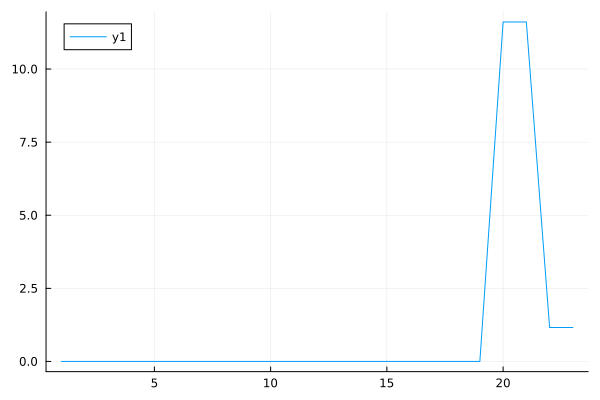

In [21]:
plot(sol.u)